# uber demand forecasting

Import libraries

In [1328]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from statsmodels.tsa.arima.model import ARIMA

Read data

In [1329]:
df = pd.read_csv('dataset_2.csv', low_memory = False)
df.head()

,Name,Trips Completed,Accept Rate,Supply Hours,Rating
0,Abdul,1,100%,3,4.8
1,Abraham,12,83%,5,4.7
2,Adelina,1,100%,2,4.7
3,Akilah,1,100%,2,4.9
4,Alec,21,76%,11,5.0


Remove the '%' sign and convert to float

In [1330]:
df['Accept Rate'] = df['Accept Rate'].str.replace('%', '').astype(float) / 100

### Trips Completed Prediction

Feature engineering (example: create a new feature 'Trips per Hour')

In [1331]:
df['Trips per Hour'] = df['Trips Completed'] / df['Supply Hours']

Select features and target variable

In [1332]:
X = df[['Accept Rate', 'Supply Hours', 'Trips per Hour', 'Rating']]
y = df['Trips Completed']

Split data into training and testing sets

In [1333]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Linear Regression

In [1334]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 4.625442863794395
R-squared: 0.8770589686887743


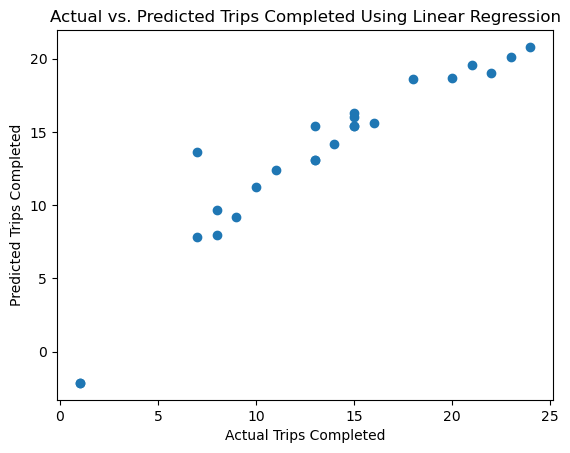

In [1335]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Trips Completed')
plt.ylabel('Predicted Trips Completed')
plt.title('Actual vs. Predicted Trips Completed Using Linear Regression')
plt.show()

#### Decision Tree Regression

In [1336]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)
print(f"Decision Tree - MSE: {dt_mse}, R-squared: {dt_r2}")

Decision Tree - MSE: 1.875, R-squared: 0.950163813391168


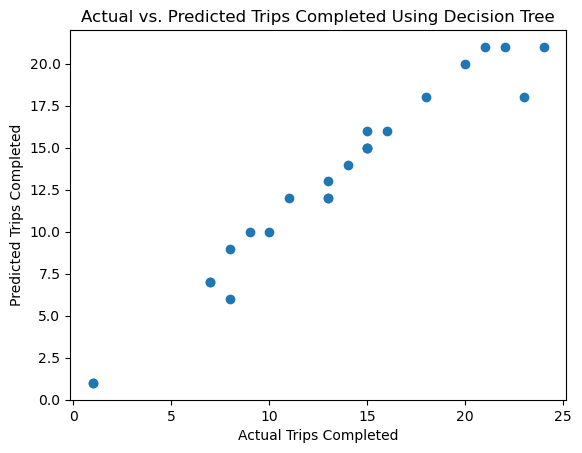

In [1337]:
plt.scatter(y_test, dt_pred)
plt.xlabel('Actual Trips Completed')
plt.ylabel('Predicted Trips Completed')
plt.title('Actual vs. Predicted Trips Completed Using Decision Tree')
plt.show()

#### Random Forest Regression

In [1338]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print(f"Random Forest - MSE: {rf_mse}, R-squared: {rf_r2}")

Random Forest - MSE: 2.000875, R-squared: 0.946818144063495


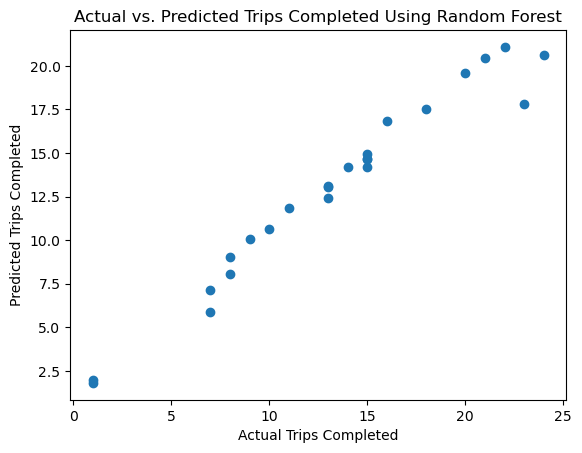

In [1339]:
plt.scatter(y_test, rf_pred)
plt.xlabel('Actual Trips Completed')
plt.ylabel('Predicted Trips Completed')
plt.title('Actual vs. Predicted Trips Completed Using Random Forest')
plt.show()

#### XGBoost

In [1340]:
xg_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3)
xg_model.fit(X_train, y_train)
xg_pred = xg_model.predict(X_test)
mse = mean_squared_error(y_test, xg_pred)
r2 = r2_score(y_test, xg_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.3161206012580664
R-squared: 0.9650184363285198


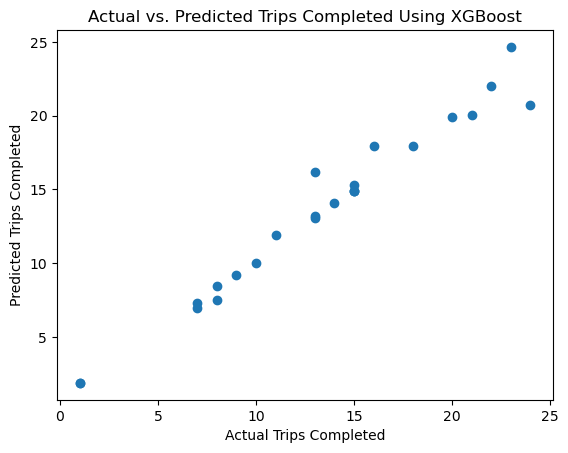

In [1341]:
plt.scatter(y_test, xg_pred)
plt.xlabel('Actual Trips Completed')
plt.ylabel('Predicted Trips Completed')
plt.title('Actual vs. Predicted Trips Completed Using XGBoost')
plt.show()

#### ARIMA

In [1342]:
p, d, q = 2, 0, 2  # Example choice based on PACF and ACF (adjust as needed)

# Split data for ARIMA
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Define target for ARIMA
y_train = train['Trips Completed']
y_test = test['Trips Completed']

# Fit the ARIMA model
arima_model = ARIMA(y_train, order=(p, d, q))
arima_results = arima_model.fit()

# Forecast future values
arima_forecast = arima_results.forecast(steps=len(y_test))

# Evaluate the ARIMA model
arima_mse = mean_squared_error(y_test, arima_forecast)
arima_r2 = r2_score(y_test, arima_forecast)

print("\nARIMA Model Performance:")
print(f"ARIMA({p},{d},{q}) - Mean Squared Error: {arima_mse:.4f}")
print(f"ARIMA({p},{d},{q}) - R-squared: {arima_r2:.4f}")


ARIMA Model Performance:
ARIMA(2,0,2) - Mean Squared Error: 19.8532
ARIMA(2,0,2) - R-squared: 0.0255


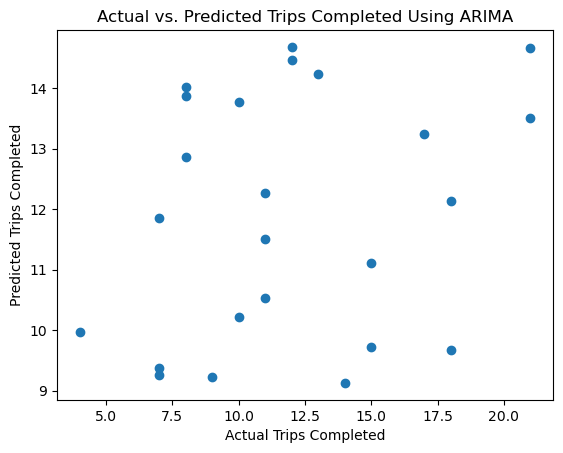

In [1343]:
plt.scatter(y_test, arima_forecast)
plt.xlabel('Actual Trips Completed')
plt.ylabel('Predicted Trips Completed')
plt.title('Actual vs. Predicted Trips Completed Using ARIMA')
plt.show()

### Rating Prediction

In [1344]:
X = df[['Accept Rate', 'Supply Hours', 'Trips per Hour', 'Trips Completed']]
y = df['Rating']

In [1345]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Linear Regression

In [1346]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.036711821874035926
R-squared: -0.8614444893877351


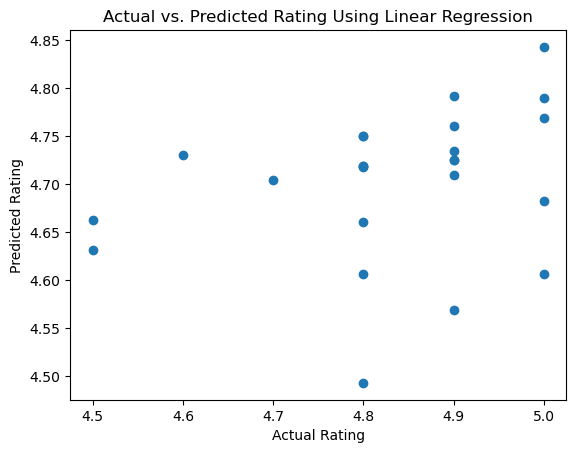

In [1347]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs. Predicted Rating Using Linear Regression')
plt.show()

#### Decision Tree Regression

In [1348]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)
print(f"Decision Tree - MSE: {dt_mse}, R-squared: {dt_r2}")

Decision Tree - MSE: 0.07052083333333334, R-squared: -2.575704225352109


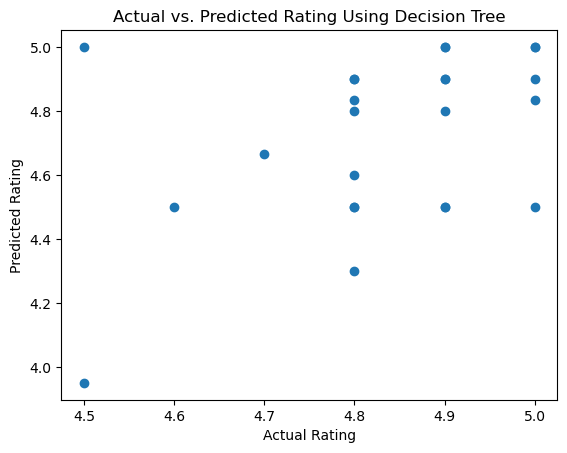

In [1349]:
plt.scatter(y_test, dt_pred)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs. Predicted Rating Using Decision Tree')
plt.show()

#### Random Forest

In [1350]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print(f"Random Forest - MSE: {rf_mse}, R-squared: {rf_r2}")

Random Forest - MSE: 0.03170418540680505, R-squared: -0.6075361614718036


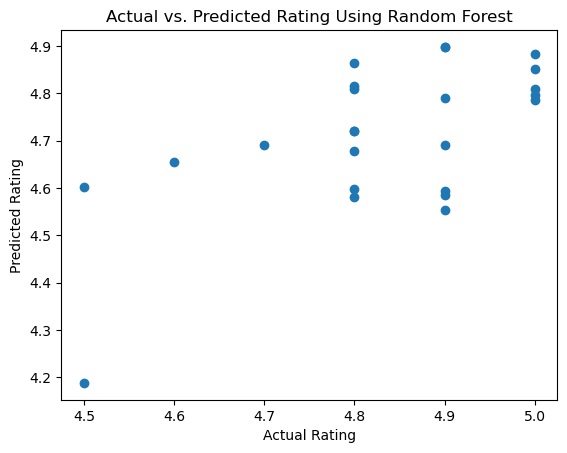

In [1351]:
plt.scatter(y_test, rf_pred)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs. Predicted Rating Using Random Forest')
plt.show()

#### XGBoost

In [1352]:
xg_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3)
xg_model.fit(X_train, y_train)
xg_pred = xg_model.predict(X_test)
mse = mean_squared_error(y_test, xg_pred)
r2 = r2_score(y_test, xg_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.07025006774458845
R-squared: -2.561975265922791


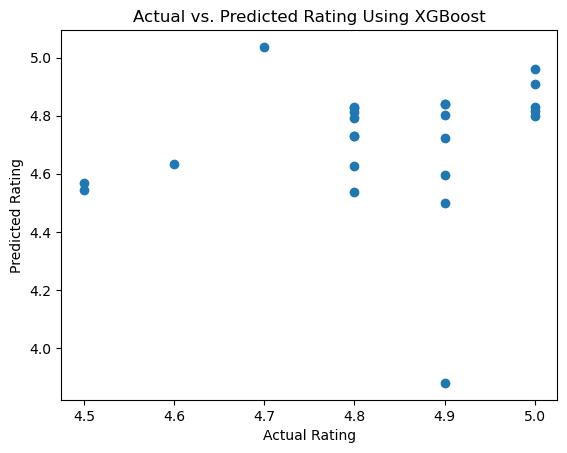

In [1353]:
plt.scatter(y_test, xg_pred)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs. Predicted Rating Using XGBoost')
plt.show()

#### ARIMA

In [1354]:
p, d, q = 2, 0, 2  # Example choice based on PACF and ACF (adjust as needed)

# Split data for ARIMA
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Define target for ARIMA
y_train = train['Rating']
y_test = test['Rating']

# Fit the ARIMA model
arima_model = ARIMA(y_train, order=(p, d, q))
arima_results = arima_model.fit()

# Forecast future values
arima_forecast = arima_results.forecast(steps=len(y_test))

# Evaluate the ARIMA model
arima_mse = mean_squared_error(y_test, arima_forecast)
arima_r2 = r2_score(y_test, arima_forecast)

print("\nARIMA Model Performance:")
print(f"ARIMA({p},{d},{q}) - Mean Squared Error: {arima_mse:.4f}")
print(f"ARIMA({p},{d},{q}) - R-squared: {arima_r2:.4f}")


ARIMA Model Performance:
ARIMA(2,0,2) - Mean Squared Error: 0.5693
ARIMA(2,0,2) - R-squared: -0.0640


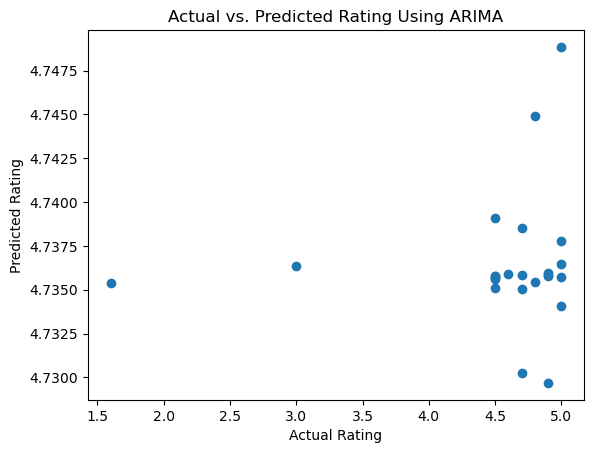

In [1355]:
plt.scatter(y_test, arima_forecast)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs. Predicted Rating Using ARIMA')
plt.show()

### Accept Rate Prediction

In [1356]:
X = df[['Trips Completed', 'Supply Hours', 'Trips per Hour', 'Rating']]
y = df['Accept Rate']

In [1357]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Linear Regression

In [1358]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.03917814813595199
R-squared: 0.13473897072132468


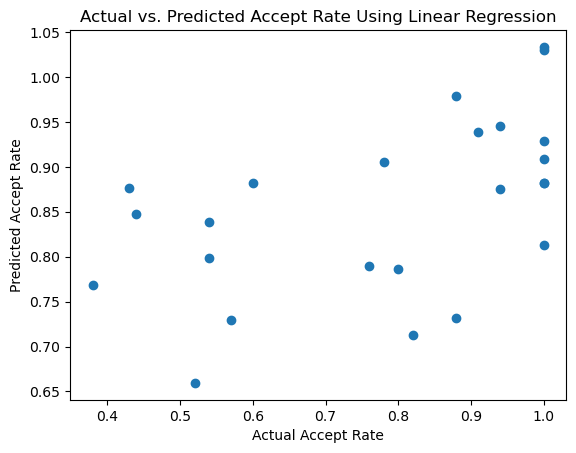

In [1359]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Accept Rate')
plt.ylabel('Predicted Accept Rate')
plt.title('Actual vs. Predicted Accept Rate Using Linear Regression')
plt.show()

#### Decision Tree Regression

In [1360]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)
print(f"Decision Tree - MSE: {dt_mse}, R-squared: {dt_r2}")

Decision Tree - MSE: 0.06782916666666666, R-squared: -0.4980272768752374


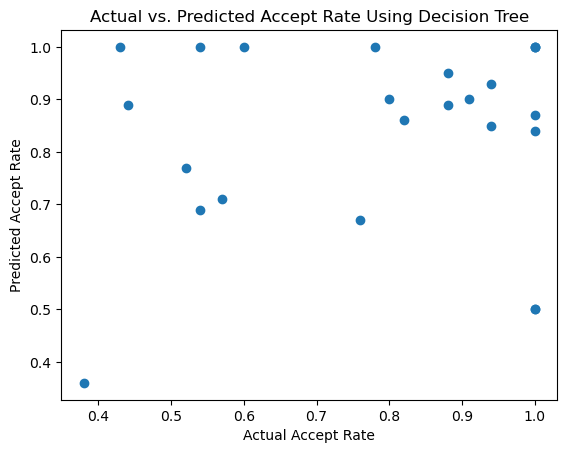

In [1361]:
plt.scatter(y_test, dt_pred)
plt.xlabel('Actual Accept Rate')
plt.ylabel('Predicted Accept Rate')
plt.title('Actual vs. Predicted Accept Rate Using Decision Tree')
plt.show()

#### Random Forrest

In [1362]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print(f"Random Forest - MSE: {rf_mse}, R-squared: {rf_r2}")

Random Forest - MSE: 0.0449772350754629, R-squared: 0.006664414549201747


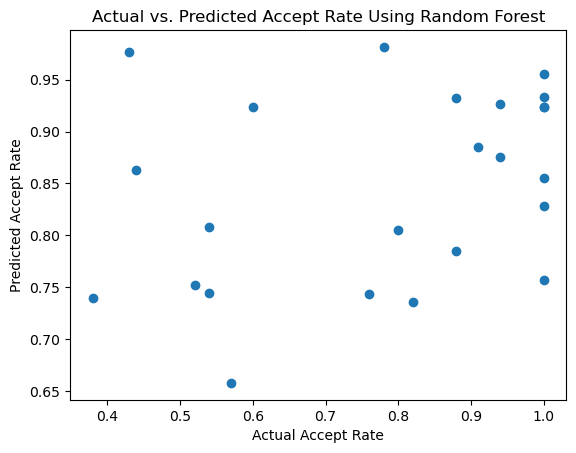

In [1363]:
plt.scatter(y_test, rf_pred)
plt.xlabel('Actual Accept Rate')
plt.ylabel('Predicted Accept Rate')
plt.title('Actual vs. Predicted Accept Rate Using Random Forest')
plt.show()

#### XGBoost

In [1364]:
xg_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3)
xg_model.fit(X_train, y_train)
xg_pred = xg_model.predict(X_test)
mse = mean_squared_error(y_test, xg_pred)
r2 = r2_score(y_test, xg_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.05306958583579267
R-squared: -0.17205755372427056


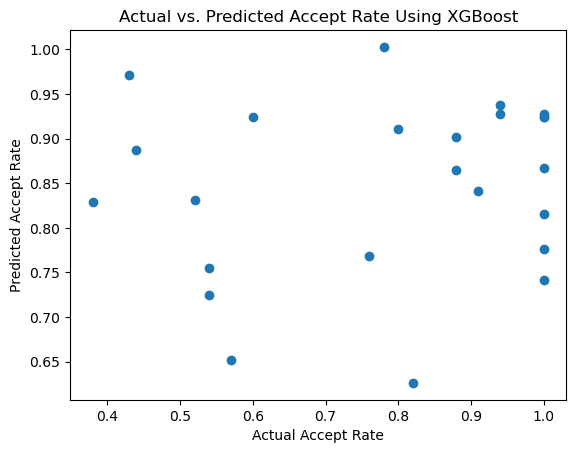

In [1365]:
plt.scatter(y_test, xg_pred)
plt.xlabel('Actual Accept Rate')
plt.ylabel('Predicted Accept Rate')
plt.title('Actual vs. Predicted Accept Rate Using XGBoost')
plt.show()

#### ARIMA

In [1366]:
p, d, q = 2, 0, 2  # Example choice based on PACF and ACF (adjust as needed)

# Split data for ARIMA
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Define target for ARIMA
y_train = train['Accept Rate']
y_test = test['Accept Rate']

# Fit the ARIMA model
arima_model = ARIMA(y_train, order=(p, d, q))
arima_results = arima_model.fit()

# Forecast future values
arima_forecast = arima_results.forecast(steps=len(y_test))

# Evaluate the ARIMA model
arima_mse = mean_squared_error(y_test, arima_forecast)
arima_r2 = r2_score(y_test, arima_forecast)

print("\nARIMA Model Performance:")
print(f"ARIMA({p},{d},{q}) - Mean Squared Error: {arima_mse:.4f}")
print(f"ARIMA({p},{d},{q}) - R-squared: {arima_r2:.4f}")


ARIMA Model Performance:
ARIMA(2,0,2) - Mean Squared Error: 0.0282
ARIMA(2,0,2) - R-squared: -0.2457


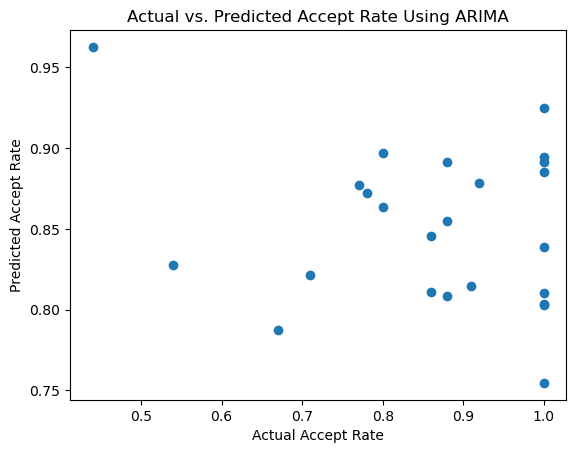

In [1367]:
plt.scatter(y_test, arima_forecast)
plt.xlabel('Actual Accept Rate')
plt.ylabel('Predicted Accept Rate')
plt.title('Actual vs. Predicted Accept Rate Using ARIMA')
plt.show()

### Supply Hours Prediction

In [1368]:
X = df[['Accept Rate', 'Trips Completed', 'Trips per Hour', 'Rating']]
y = df['Supply Hours']

In [1369]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Linear Regression

In [1370]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.3939392837972766
R-squared: 0.8326924302006186


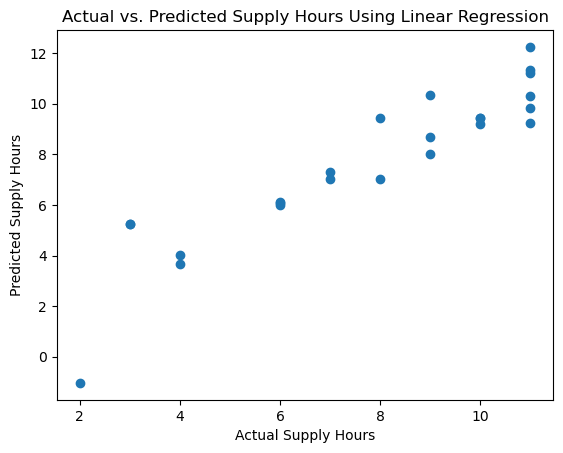

In [1371]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Supply Hours')
plt.ylabel('Predicted Supply Hours')
plt.title('Actual vs. Predicted Supply Hours Using Linear Regression')
plt.show()

#### Decision Tree Regression

In [1372]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)
print(f"Decision Tree - MSE: {dt_mse}, R-squared: {dt_r2}")

Decision Tree - MSE: 1.0416666666666667, R-squared: 0.8749739529068556


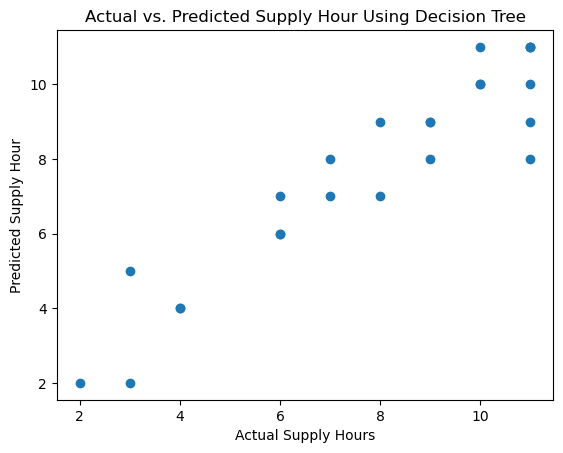

In [1373]:
plt.scatter(y_test, dt_pred)
plt.xlabel('Actual Supply Hours')
plt.ylabel('Predicted Supply Hour')
plt.title('Actual vs. Predicted Supply Hour Using Decision Tree')
plt.show()

#### Random Forrest

In [1374]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print(f"Random Forest - MSE: {rf_mse}, R-squared: {rf_r2}")

Random Forest - MSE: 0.5258583333333333, R-squared: 0.9368838508022505


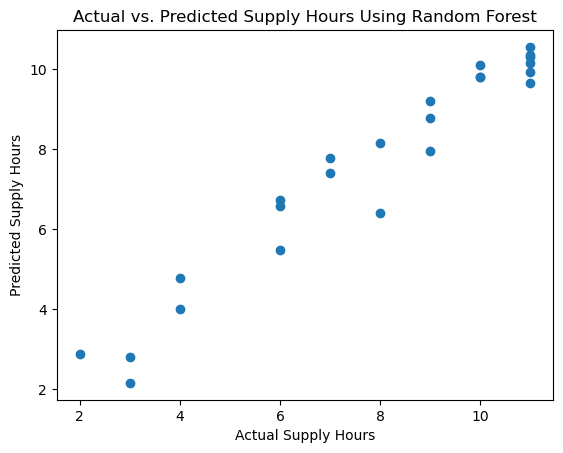

In [1375]:
plt.scatter(y_test, rf_pred)
plt.xlabel('Actual Supply Hours')
plt.ylabel('Predicted Supply Hours')
plt.title('Actual vs. Predicted Supply Hours Using Random Forest')
plt.show()

#### XGBoost

In [1376]:
xg_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3)
xg_model.fit(X_train, y_train)
xg_pred = xg_model.predict(X_test)
mse = mean_squared_error(y_test, xg_pred)
r2 = r2_score(y_test, xg_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.3243460211936551
R-squared: 0.9610703671165773


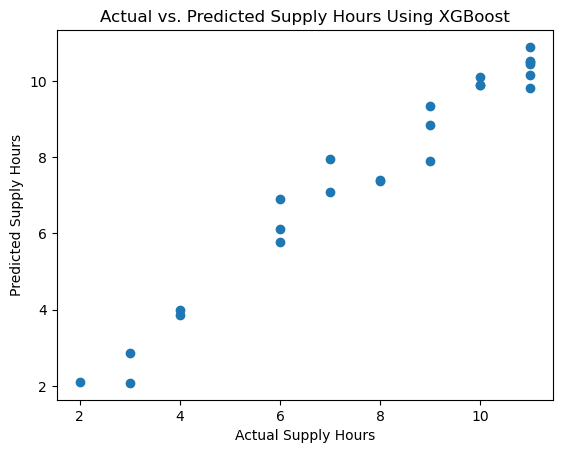

In [1377]:
plt.scatter(y_test, xg_pred)
plt.xlabel('Actual Supply Hours')
plt.ylabel('Predicted Supply Hours')
plt.title('Actual vs. Predicted Supply Hours Using XGBoost')
plt.show()

#### ARIMA

In [1378]:
p, d, q = 2, 0, 2  # Example choice based on PACF and ACF (adjust as needed)

# Split data for ARIMA
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Define target for ARIMA
y_train = train['Supply Hours']
y_test = test['Supply Hours']

# Fit the ARIMA model
arima_model = ARIMA(y_train, order=(p, d, q))
arima_results = arima_model.fit()

# Forecast future values
arima_forecast = arima_results.forecast(steps=len(y_test))

# Evaluate the ARIMA model
arima_mse = mean_squared_error(y_test, arima_forecast)
arima_r2 = r2_score(y_test, arima_forecast)

print("\nARIMA Model Performance:")
print(f"ARIMA({p},{d},{q}) - Mean Squared Error: {arima_mse:.4f}")
print(f"ARIMA({p},{d},{q}) - R-squared: {arima_r2:.4f}")


ARIMA Model Performance:
ARIMA(2,0,2) - Mean Squared Error: 6.2042
ARIMA(2,0,2) - R-squared: -0.0449


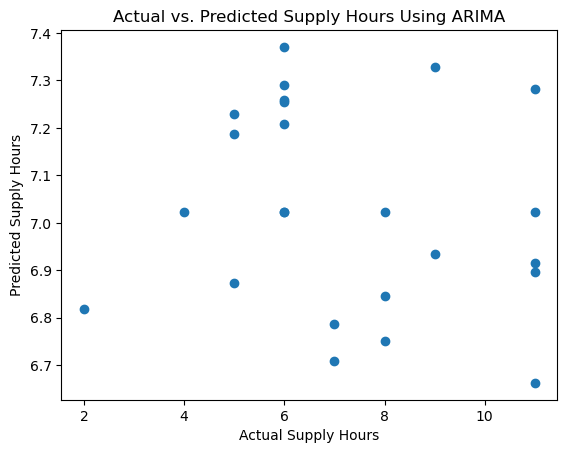

In [1379]:
plt.scatter(y_test, arima_forecast)
plt.xlabel('Actual Supply Hours')
plt.ylabel('Predicted Supply Hours')
plt.title('Actual vs. Predicted Supply Hours Using ARIMA')
plt.show()